# **Load and Explore the Dataset**

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
print(df.head())

   Years of Experience    Salary
0                  5.0   90000.0
1                  3.0   65000.0
2                 15.0  150000.0
3                  7.0   60000.0
4                 20.0  200000.0


In [ ]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull()

,Years of Experience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
6699,False,False
6700,False,False
6701,False,False
6702,False,False


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


# Feature Scaling (Very Important for SVR)

In [ ]:
from sklearn.preprocessing import StandardScaler
x=df[['Years of Experience']].values
y=df[['Salary']].values


sc_x=StandardScaler()
sc_y=StandardScaler()


x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y)

## Flatten for SVR

In [ ]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [ ]:
y_scaled=y_scaled.ravel()

In [ ]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

## Train SVR Model(RBF Kernal)

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(x_scaled,y_scaled)

SVR(C=100)

## Prediction And Inversing Scaling

In [ ]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_pred_scaled
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

# **Visualization:Actual vs Prediction**

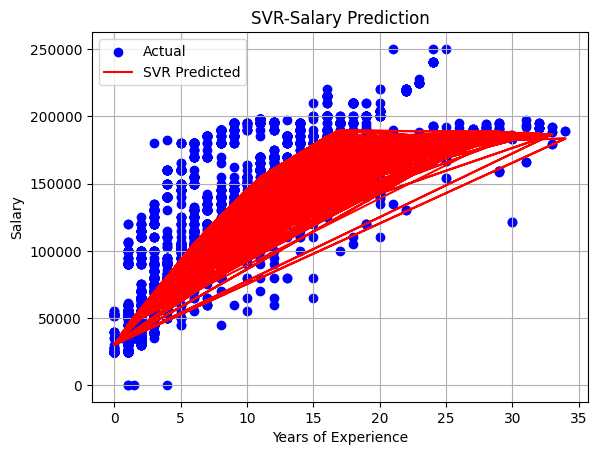

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='blue',label='Actual')
plt.plot(x, y_pred, color='red', label='SVR Predicted')
plt.title('SVR-Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

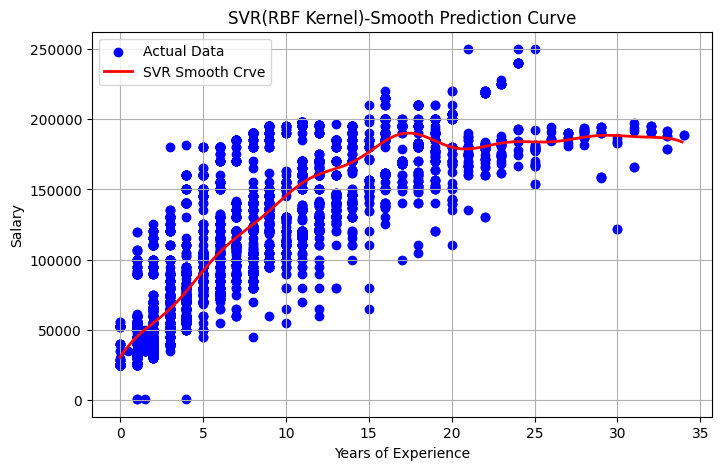

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.1)
x_grid = x_grid.reshape(-1, 1)


x_grid_scaled = sc_x.transform(x_grid)


y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))


plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_grid, y_grid, color='red', label='SVR Smooth Crve',linewidth=2)
plt.title('SVR(RBF Kernel)-Smooth Prediction Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

# Evaluate model Performence

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y,y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R2 Score: 0.7275580175081495


# **Understanding and Comparing Kernel**

## Compare Kernels Using Code

Kernel:LINEAR|R2 Score:0.6326


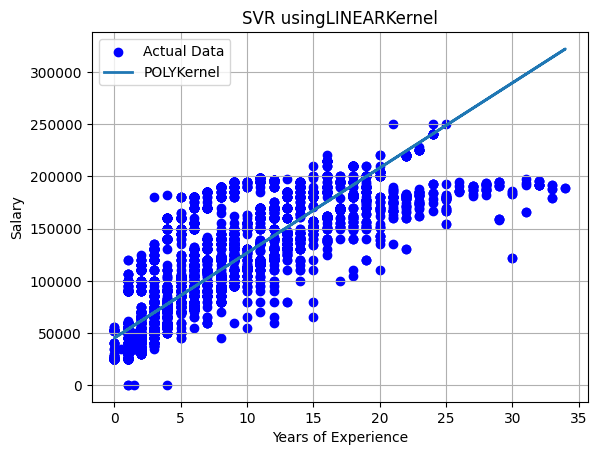

Kernel:POLY|R2 Score:-0.0216


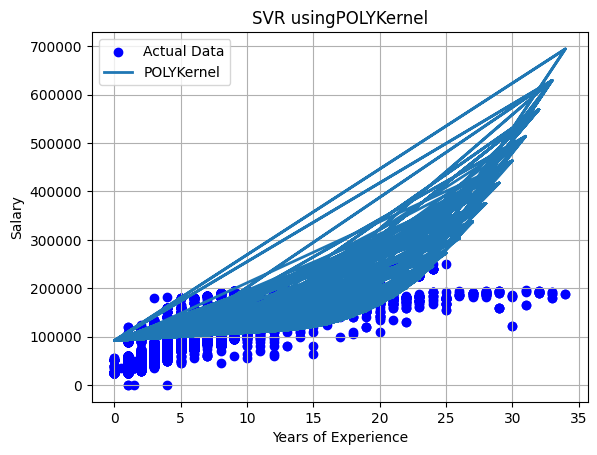

Kernel:RBF|R2 Score:0.7249


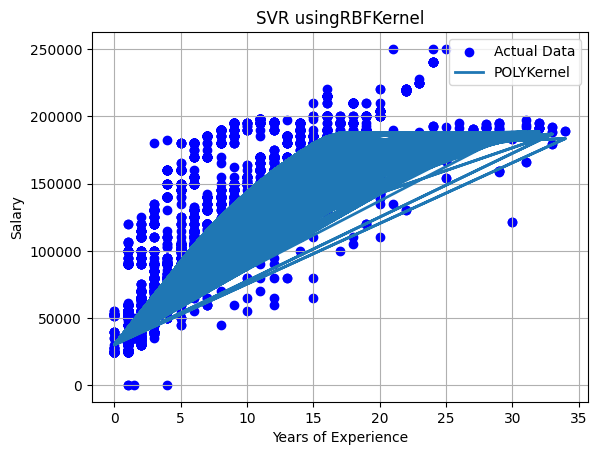

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  r2_score
import matplotlib.pyplot as plt


x=df[['Years of Experience']].values
y=df[['Salary']].values

sc_x=StandardScaler()
sc_y=StandardScaler()

x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y).ravel()


kernels=['linear','poly','rbf']

for kernel in kernels:
  if kernel=='poly':
    model=SVR(kernel=kernel,degree=3)
  else:
    model=SVR(kernel=kernel)
  model.fit(x_scaled,y_scaled)


  y_pred_scaled=model.predict(x_scaled)
  y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))


  score=r2_score(y,y_pred)
  print(f"Kernel:{kernel.upper()}|R2 Score:{score:.4f}")


  plt.scatter(x,y,color='blue',label='Actual Data')
  plt.plot(x,y_pred,label=f'{Kernel.upper()}Kernel',linewidth=2)
  plt.title(f'SVR using{kernel.upper()}Kernel')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.legend()
  plt.show()


# **TRY Diffrent C and epsilon Values**

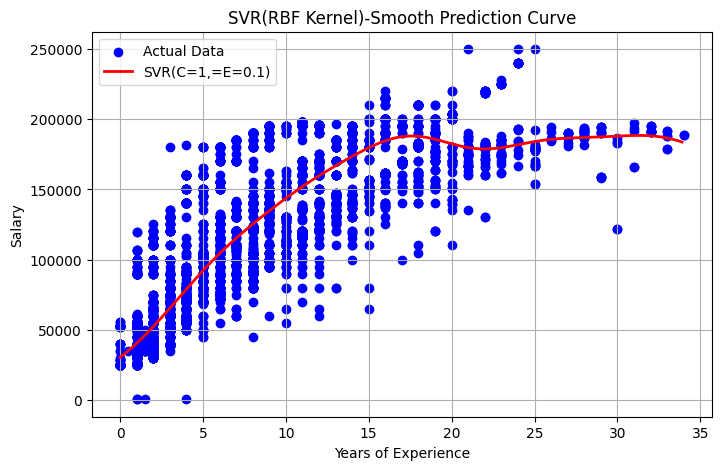

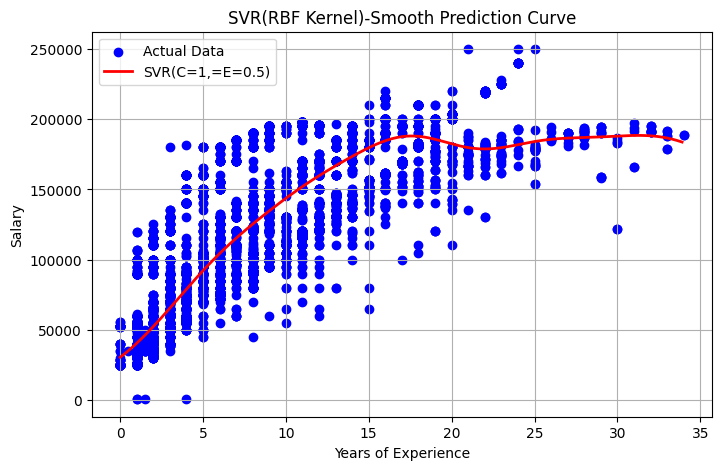

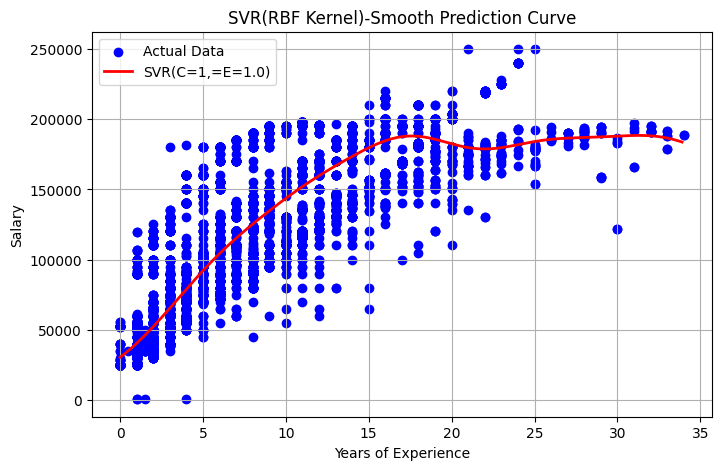

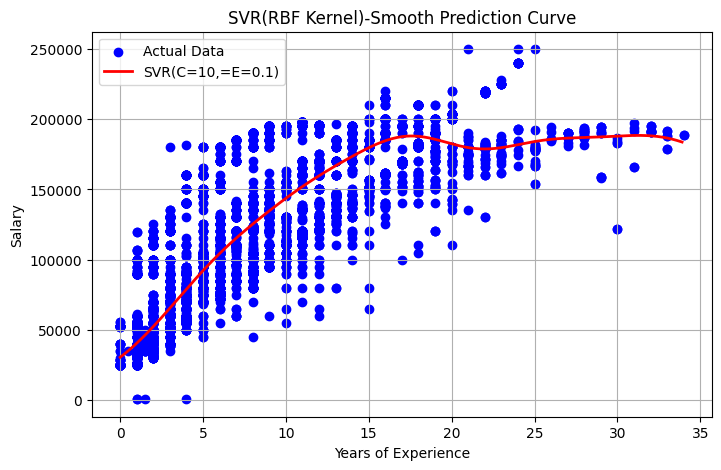

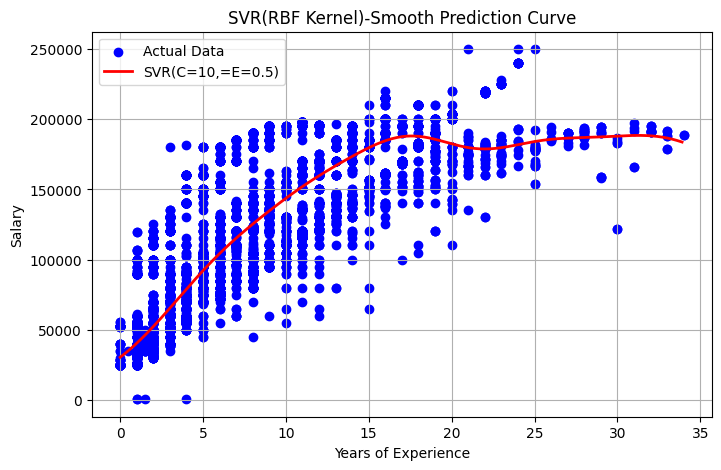

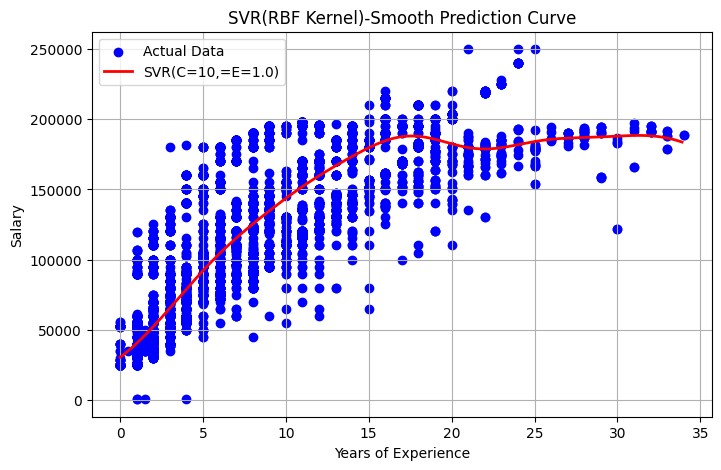

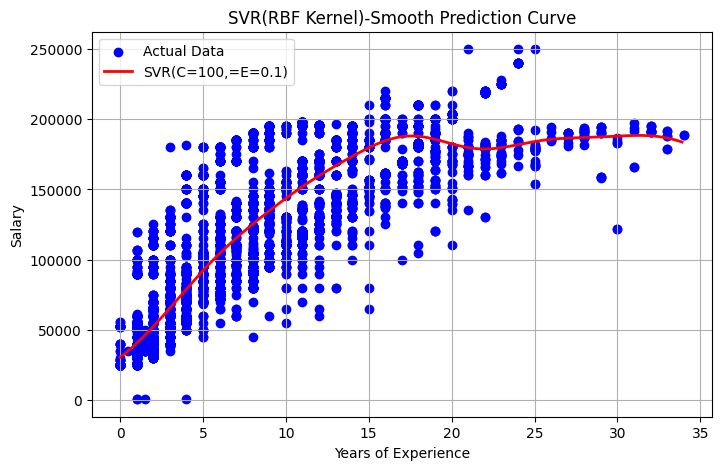

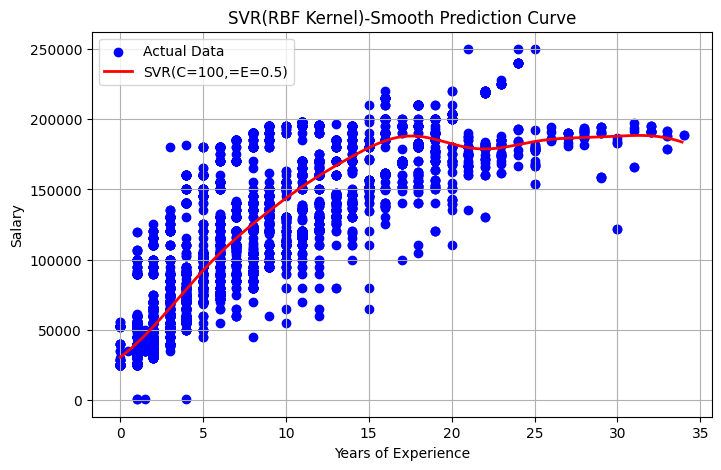

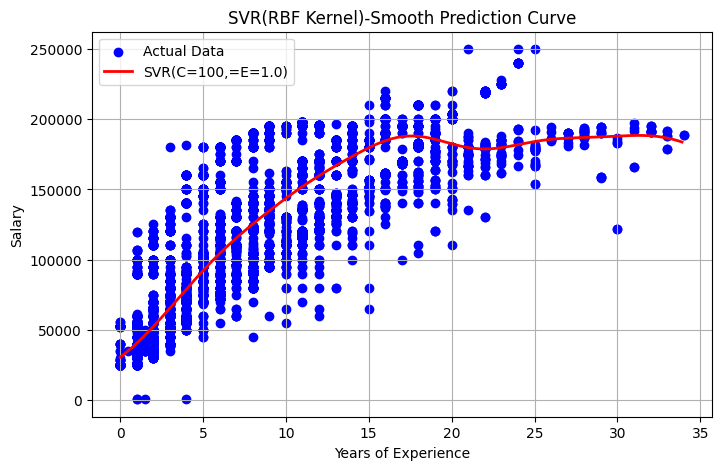

In [39]:
C_values=[1,10,100]
epsilon_values=[0.1,0.5,1.0]

x_grid=np.arange(min(x.ravel()),max(x.ravel()),0.1)
x_grid=x_grid.reshape(-1,1)

x_grid_scaled=sc_x.transform(x_grid)

for C in C_values:
  for eps in epsilon_values:
    svr=SVR(kernel='rbf',C=C,epsilon=eps)
    model.fit(x_scaled,y_scaled)

    y_grid_scaled=model.predict(x_grid_scaled)
    y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

    plt.figure(figsize=(8,5))
    plt.scatter(x,y,color='blue',label='Actual Data')
    plt.plot(x_grid,y_grid,color='red',label=f'SVR(C={C},=E={eps})',linewidth=2)
    plt.title(f'SVR(RBF Kernel)-Smooth Prediction Curve')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.legend()
    plt.show()